In [2]:
import pandas as pd

df = pd.read_csv('../Web Service/data/all.csv', encoding='cp949')

In [3]:
df

,title,writer,illustrator,genre,story,platform,thumb,url
0,나라 구한 전생,양키풀,양키풀,드라마,아버지의 빚 문제로 폐공장에 납치되어 있던 한자인은 재수 좋은 남자 천운조의 등장으...,네이버 웹툰,https://shared-comic.pstatic.net/thumb/webtoon...,https://comic.naver.com/webtoon/list?titleId=7...
1,모죠의 일지,모죠,모죠,개그,소신있는 취향과 내성적인 성향.훌륭한 집순이 모죠의 은밀한 비밀들,네이버 웹툰,https://shared-comic.pstatic.net/thumb/webtoon...,https://comic.naver.com/webtoon/list?titleId=7...
2,밤하늘에 구름운,견지,그리온,로맨스,"망겜 <검풍 온라인>의 NPC 초낙운, 서윤의 평범했던 일상에 등장!?NPC와의 좌...",네이버 웹툰,https://shared-comic.pstatic.net/thumb/webtoon...,https://comic.naver.com/webtoon/list?titleId=7...
3,롤랑롤랑,자유,자유,판타지,코기 왕자 롤랑과 마녀 루이사의 모험 이야기.베일에 숨겨져 있던 대사제의 과거와 교...,네이버 웹툰,https://shared-comic.pstatic.net/thumb/webtoon...,https://comic.naver.com/webtoon/list?titleId=7...
4,샹치,진 루엔 양,다이크 루언,액션,지도자 젱 주의 죽음 이후 모습을 드러내지 않았던 사악한 고대 비밀 집단.하지만 힘...,네이버 웹툰,https://shared-comic.pstatic.net/thumb/webtoon...,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...
3609,도깨비도 수풀이 있어야 모인다[개정판],신,신,"BL, GL",해당 작품은 도깨비도 수풀이 있어야 모인다 성인 버전의 일부 장면을 수정한 개정판입...,레진코믹스,https://ccdn.lezhin.com/v2/comics/561274859926...,https://www.lezhin.com/ko/comic/bush_15
3610,던전 속 사정[개정판],레바,레바,판타지,해당 작품은 던전 속 사정 성인 버전의 일부 장면을 수정한 개정판입니다. 마물을 물...,레진코믹스,https://ccdn.lezhin.com/v2/comics/514507002563...,https://www.lezhin.com/ko/comic/dungeon_15
3611,"튀어나왔어요, BL만화!",믹,마롭,드라마,슬럼프로 인해 휴재에 들어간 작가 육번 필명 앞에 그의 만화 네버엔딩 튜토리얼 의 ...,레진코믹스,NaN,NaN
3612,포젯션,Happykwak,Happykwak,판타지,인간계 저 아래의 지하왕국 저저저 에서는 17대 대왕의 갑작스런 하야 선언으로 새로...,레진코믹스,https://ccdn.lezhin.com/v2/comics/480566273336...,https://www.lezhin.com/ko/comic/pozetssion


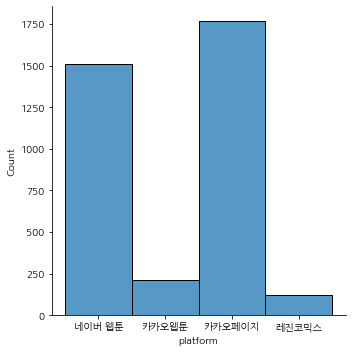

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

sns.displot(data=df, x='platform')
plt.show()

In [5]:
len(df['writer'].unique())

2582

In [6]:
len(df['illustrator'].unique())

2580

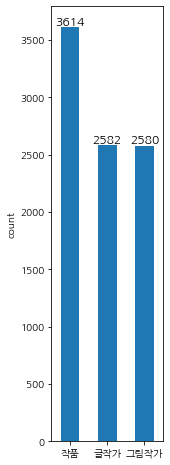

In [7]:
x = ['작품', '글작가', '그림작가']
y = [len(df), len(df['writer'].unique()), len(df['illustrator'].unique())]

plt.figure(figsize=(2, 8))
plt.bar(x=x, height=y, width=0.5)
plt.xlim(0-0.5, 2 + 0.5)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 12, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.ylabel('count')
plt.show()

In [11]:
with open('stopwords_korean.txt','r',encoding='utf8') as f:
    stopwords = f.readline()
stopwords = stopwords.split()
stopwords.extend(['신작','은','는','도','고','이다','고','다','못','게','만화','작가', '개정판', '위해', '처럼', '싶다', '날'])

In [12]:
from konlpy.tag import Okt

okt = Okt()

words = []
for story in df['story']:
    tokens = okt.morphs(story,stem=True)
    for token in tokens:
        if token not in stopwords:
            words.append(token)

In [23]:
from wordcloud import WordCloud

font_path = r'c:\users\master\appdata\local\microsoft\windows\fonts\nanumgothic.ttf'
wordcloud = WordCloud(background_color='white', font_path=font_path, width=1200, height=600, colormap='tab10').generate(' '.join(words))

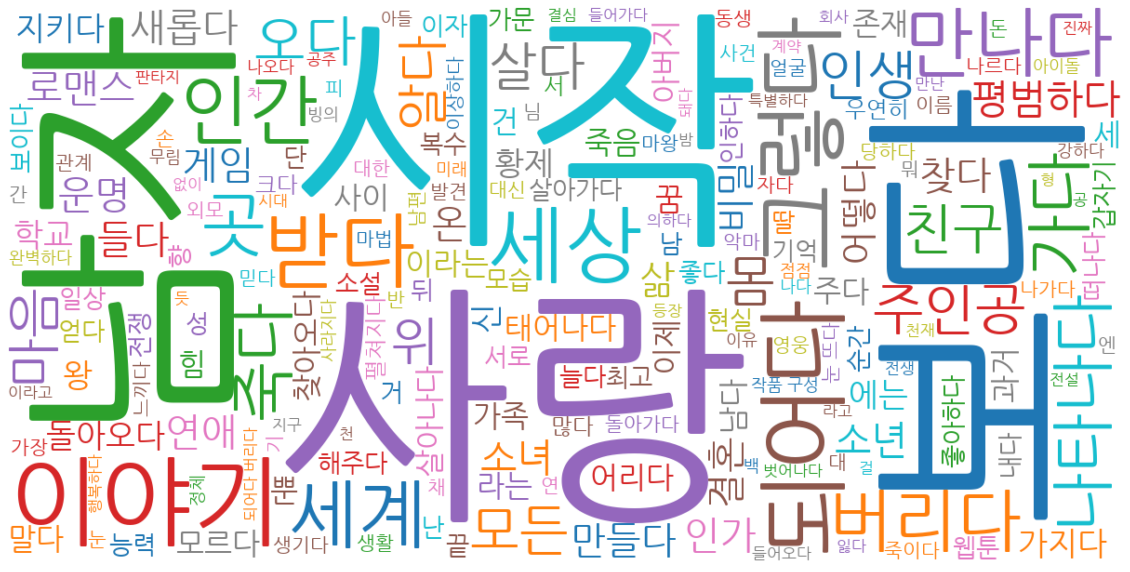

In [24]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()